In [1]:
import math
import numpy as np
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt

def _parse_if_number(s):
    try: return int(s)
    except:
        try: return float(s)
        except: return True if s=="true" else False if s=="false" else s if s else None

df = pd.read_csv('General.csv', converters = {'value': _parse_if_number})

def _split_by_types(df, types):
    result = list()
    for t in types:
        mask = df['type'] == t
        result.append(df[mask])
        df = df[~mask]
    result.append(df)
    return result

itervars, runattrs, configs, attrs, df = _split_by_types(df, ["itervar", "runattr", "config", "attr"])

def _append_metadata_columns(df, meta, suffix):
    meta = pd.pivot_table(meta, index="run", columns="attrname", values="attrvalue", aggfunc="first")

    if not meta.empty:
        df = df.join(meta, on="run", rsuffix=suffix)
    return df

df = _append_metadata_columns(df, itervars, "_itervar")

df = df[['value', 'lambda']]

In [2]:
df

,value,lambda
550,1.000000,0.1
554,1.000000,0.1
558,1.000000,0.1
562,1.000058,0.1
566,1.000000,0.1
570,1.007696,0.3
574,1.005957,0.3
578,1.008681,0.3
582,1.007731,0.3
586,1.006419,0.3


In [3]:
def conf_band(values): 
    return st.norm.interval(0.99, loc=0, scale=st.sem(values))[1] if len(values) > 1 else math.nan

In [4]:
def mean(values): 
    return np.mean(values)

def conf_int(values): 
    #return st.norm.interval(0.95, loc=0, scale=st.sem(values))[1] if len(values) > 1 else
    return math.nan

df = pd.pivot_table(df, values="value", index="lambda", aggfunc=[mean, conf_int, conf_band], dropna=False)
xs = df["mean"].index.values
ys = df["mean"]["value"].values
confint_U = df["conf_int"]["value"].values
confint_L = df["conf_int"]["value"].values
confband_U = 2*df["conf_band"]["value"].values
confband_L = 2*df["conf_band"]["value"].values

In [5]:
df

,mean,conf_int,conf_band
,value,value,value
lambda,,,
0.1,1.000012,NaN,0.000030
0.3,1.007297,NaN,0.001266
0.5,1.045263,NaN,0.012451
0.7,1.115875,NaN,0.012939
0.9,1.249357,NaN,0.043813


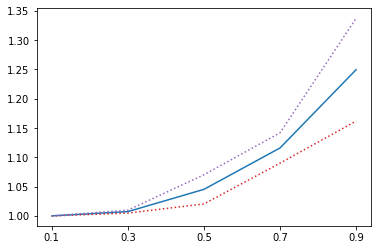

In [6]:
plt.plot(xs,ys)
#plt.fill_between(xs, ys-yerr_L, ys+yerr_U, alpha=float(0.20))
plt.plot(xs,ys-confint_L, ys+confint_U, linestyle='dashed')
plt.plot(xs,ys-confband_L, ys+confband_U, linestyle='dotted')